Імпортуємо всі потрібні бібліотеки:

In [120]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import pandas as p
import numpy as n

Зчитування датасету:

In [121]:
def read_dataset(path, separ, en):
    return p.read_csv(path, sep = separ, encoding = en)

dataset = read_dataset("fullDataset.csv", ",", "cp1252")
dataset.info()
dataset.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139483 entries, 0 to 139482
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  139483 non-null  int64  
 1   ID          139483 non-null  int64  
 2   Sex         139483 non-null  object 
 3   Age         139483 non-null  int64  
 4   Height      139483 non-null  int64  
 5   Weight      139483 non-null  int64  
 6   Team        139483 non-null  object 
 7   Year        139483 non-null  int64  
 8   Season      139483 non-null  object 
 9   Sport       139483 non-null  object 
 10  Medal       18968 non-null   object 
 11  Code        139483 non-null  object 
 12  GDP         139483 non-null  float64
 13  Population  139483 non-null  float64
dtypes: float64(2), int64(6), object(6)
memory usage: 11.7+ MB


,Unnamed: 0,ID,Sex,Age,Height,Weight,Team,Year,Season,Sport,Medal,Code,GDP,Population
0,0,1,M,24,180,80,China,1992,Summer,Basketball,NaN,CHN,4.269157e+11,1.164970e+09
1,1,2,M,23,170,60,China,2012,Summer,Judo,NaN,CHN,8.532230e+12,1.350695e+09
2,2,5,F,21,185,82,Netherlands,1988,Winter,Speed Skating,NaN,NLD,2.619105e+11,1.476009e+07
3,3,5,F,21,185,82,Netherlands,1988,Winter,Speed Skating,NaN,NLD,2.619105e+11,1.476009e+07
4,4,5,F,25,185,82,Netherlands,1992,Winter,Speed Skating,NaN,NLD,3.629629e+11,1.518417e+07


Видалення та додавання стовпців:

In [122]:
def drop_columns(dataset, columns):
    for column in columns:
        dataset = dataset.drop(column, axis = 1)
    return dataset

def add_column(data, column, condition):
    data[column] = condition

dataset = drop_columns(dataset, ["Unnamed: 0", "Sex", "Age", "Height", "Weight", "Team", "Sport"])
add_column(dataset, "GDP per capita", dataset["GDP"] / dataset["Population"])
dataset.info()
dataset.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139483 entries, 0 to 139482
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ID              139483 non-null  int64  
 1   Year            139483 non-null  int64  
 2   Season          139483 non-null  object 
 3   Medal           18968 non-null   object 
 4   Code            139483 non-null  object 
 5   GDP             139483 non-null  float64
 6   Population      139483 non-null  float64
 7   GDP per capita  139483 non-null  float64
dtypes: float64(3), int64(2), object(3)
memory usage: 6.9+ MB


,ID,Year,Season,Medal,Code,GDP,Population,GDP per capita
0,1,1992,Summer,NaN,CHN,4.269157e+11,1.164970e+09,366.460692
1,2,2012,Summer,NaN,CHN,8.532230e+12,1.350695e+09,6316.918318
2,5,1988,Winter,NaN,NLD,2.619105e+11,1.476009e+07,17744.501384
3,5,1988,Winter,NaN,NLD,2.619105e+11,1.476009e+07,17744.501384
4,5,1992,Winter,NaN,NLD,3.629629e+11,1.518417e+07,23904.037415
5,5,1992,Winter,NaN,NLD,3.629629e+11,1.518417e+07,23904.037415
6,5,1994,Winter,NaN,NLD,3.791303e+11,1.538284e+07,24646.314310
7,5,1994,Winter,NaN,NLD,3.791303e+11,1.538284e+07,24646.314310
8,6,1992,Winter,NaN,USA,6.520327e+12,2.565140e+08,25418.990776
9,6,1992,Winter,NaN,USA,6.520327e+12,2.565140e+08,25418.990776


Групування даних по роках, сезонах та країнах:

In [123]:
dataset = dataset.groupby(["Year", "Season", "Code"]).agg(GDP = ("GDP", "mean"),
                                                          Population = ("Population", "mean"),
                                                          Members = ("ID","nunique"),
                                                          GDP_p_c = ("GDP per capita", "mean"),
                                                          Medal = ("Medal", "count"))

dataset.info()
dataset.head(10)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2258 entries, (1980, 'Summer', 'AFG') to (2016, 'Summer', 'ZWE')
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   GDP         2258 non-null   float64
 1   Population  2258 non-null   float64
 2   Members     2258 non-null   int64  
 3   GDP_p_c     2258 non-null   float64
 4   Medal       2258 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 98.0+ KB


GDP   Population  Members       GDP_p_c  Medal
Year Season Code                                                         
1980 Summer AFG   3.641723e+09   13356511.0       11    272.655286      0
            AGO   5.934074e+09    8341289.0       11    711.409664      0
            AND   4.464161e+08      36067.0        2  12377.411646      0
            AUS   1.500323e+11   14692000.0      120  10211.837189     13
            AUT   8.205891e+10    7549433.0       83  10869.546494      5
            BEL   1.268293e+11    9859242.0       59  12864.002566      1
            BEN   1.405252e+09    3717165.0        7    378.043898      0
            BGR   1.983923e+10    8861535.0      264   2238.802958     89
            BRA   2.373935e+11  120694009.0      105   1966.903675      9
            BWA   1.060924e+09     897868.0        7   1181.603342      0

Тестування стовпців на нормальний розподіл:

In [124]:
def kolm_smirn_check(dFrame, column):
    ks_statistic, p_value = st.kstest(dFrame[column], 'norm')
    if p_value > 0.05: return True
    return False

def pearson_check(dFrame, column):
    statistic, p_value = st.normaltest(dFrame[column])
    if p_value > 0.05: return True
    return False

def columns_normal_test(dataset):
    print("\n#1 test - Kolmagorov-Smirnov test,\n#2 test - Pearson test\n")
    for c in dataset.columns:
        print("{0:<15}".format(c + ":"),f"#1 test - {kolm_smirn_check(dataset, c)}, #2 test - {pearson_check(dataset, c)};")

columns_normal_test(dataset)


#1 test - Kolmagorov-Smirnov test,
#2 test - Pearson test

GDP:            #1 test - False, #2 test - False;
Population:     #1 test - False, #2 test - False;
Members:        #1 test - False, #2 test - False;
GDP_p_c:        #1 test - False, #2 test - False;
Medal:          #1 test - False, #2 test - False;


Виводимо матрицю кореляцій:

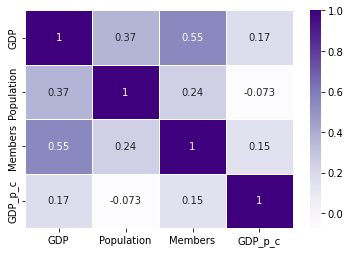

In [125]:
def corr_plot(datasetCorr):
    sns.heatmap(datasetCorr.corr(),annot=True,lw=1,cmap = "Purples")

corr_plot(dataset.drop("Medal", axis = 1))

Ділимо дані на тестові та тренувальні:

In [126]:
def split_data(x, y):
    return train_test_split(x, y, test_size=0.3)

x_train, x_test, y_train, y_test = split_data(dataset.iloc[:, :4], dataset["Medal"])

Создаємо лінійні та поліноміальні моделі з усіма можливими параметрами:

In [127]:
def lin_pol_reg_models(x_train, y_train, par):
    lin = []
    pol = []
    for i in range(len(par)):
        pol.append(make_pipeline(PolynomialFeatures(degree = 2), LinearRegression()))
        if i < 4: 
            lin.append(LinearRegression().fit(x_train[par[i]].to_numpy().reshape(-1,1), y_train))
            pol[i].fit(x_train[par[i]].to_numpy().reshape(-1,1), y_train)
        else:
            lin.append(LinearRegression().fit(x_train[par[i]].values, y_train.values))
            pol[i].fit(x_train[par[i]].values, y_train.values)
    return lin, pol

par = ["GDP", "Population", "Members", "GDP_p_c",
       ["GDP", "Population"],["GDP", "Members"],["GDP", "GDP_p_c"], ["Members", "Population"], ["Members", "GDP_p_c"], ["Population", "GDP_p_c"],
       ["GDP", "Population","Members"], ["GDP", "Population", "GDP_p_c"], ["GDP", "Members", "GDP_p_c"], ["Population", "Members", "GDP_p_c"],
       ["GDP", "Population", "Members", "GDP_p_c"]]

lin, pol = lin_pol_reg_models(x_train, y_train, par)

Прогнозування по лінійним та регресійним моделям:

In [128]:
def predict_by(x_test, par, prediction, s):
    for i in range(len(par)):
        if i < 4:
            prediction.append(s[i].predict(x_test[par[i]].to_numpy().reshape(-1,1)))
        else:
            prediction.append(s[i].predict(x_test[par[i]].values))
    return prediction

def make_predictions(x_test, par, lin, pol):
    prediction = []
    prediction = predict_by(x_test, par, prediction, lin)
    prediction = predict_by(x_test, par, prediction, pol)
    return prediction

prediction = make_predictions(x_test, par, lin, pol)

Знаходження найкращої моделі за середнім квадратичним відхиленням:

In [129]:
def flatten_par(par):
    params = []
    for el in par:
        if (isinstance(el, list)):
            params.append(", ".join(el))
        else:
            params.append(el)
    return params

def find_best_by_mse(prediction, y_test, par):
    params = flatten_par(par)
    MSE = []
    for i in range(len(prediction)):
        tempPred = prediction[i]
        MSE.append(mean_squared_error(y_test,tempPred))
    min_i = n.argmin(MSE)
    print("\nBest model is:")
    if (min_i < 15):
        print(f"linear model with {params[min_i]} param(s)")
    else:
        print(f"polynomial model with {params[min_i - 15]} param(s)")
    return MSE, min_i

MSE, min_i = find_best_by_mse(prediction, y_test, par)


Best model is:
polynomial model with Population, Members, GDP_p_c param(s)


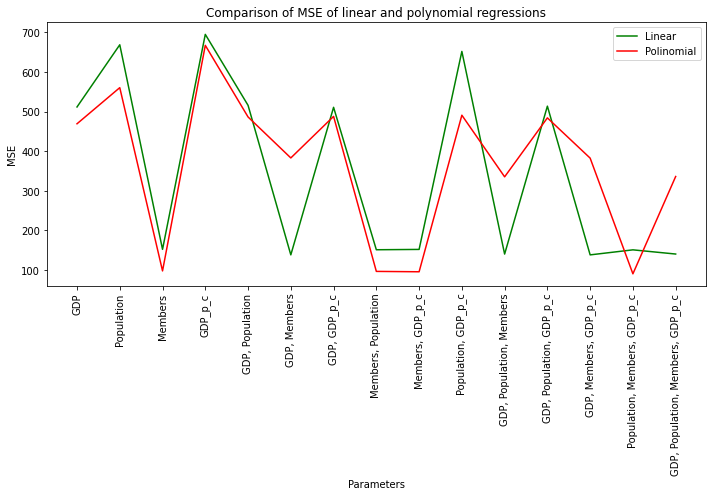

In [130]:
def mse_plot(MSE, par):
    params = flatten_par(par)
    plt.figure(figsize=(10,7))  
    plt.plot(params, MSE[0:15], color = "green")
    plt.plot(params, MSE[15:30], color = "red")
    plt.legend(["Linear", "Polinomial"])
    plt.title("Comparison of MSE of linear and polynomial regressions")
    plt.xlabel("Parameters")
    plt.ylabel("MSE")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

mse_plot(MSE, par)

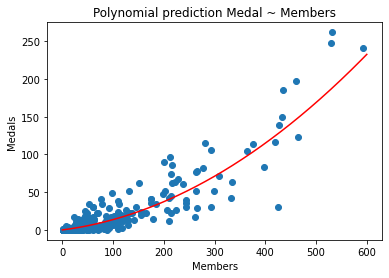

In [131]:
def pol_2d_plot(x_test, y_test, pred, column):
    mymodel = n.poly1d(n.polyfit(x_test[column], pred , 2))
    myline = n.linspace(0, 600, 600)
    plt.scatter(x_test[column], y_test)
    plt.plot(myline, mymodel(myline), color = "red")
    plt.title(f"Polynomial prediction Medal ~ {column}")
    plt.ylabel("Medals")
    plt.xlabel(column)
    plt.show()

pol_2d_plot(x_test, y_test, prediction[17], par[2])

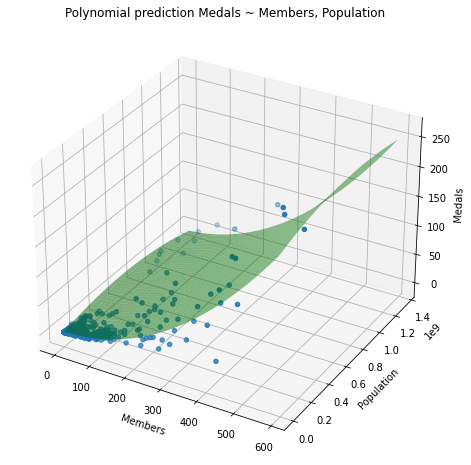

In [132]:
def pol_3d_plot(x_test, y_test, pol, params):
    params_values = []
    for i in range(len(params)):
        values = n.linspace(x_test[params[i]].min(), x_test[params[i]].max()).reshape(-1, 1)
        params_values.append(values)
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(projection='3d')
    X_3d = params_values[0]
    Y_3d = params_values[1]
    XX, YY = n.meshgrid(X_3d, Y_3d)
    Z = []
    for i in range(len(Y_3d)):
        temp = []
        for j in range(len(X_3d)):
            temp.append(pol.predict(n.array([X_3d[j], Y_3d[i]]).T)[0])
        Z.append(temp)
    Z = n.array(Z)
    ax.set_title(f'Polynomial prediction Medals ~ {params[0]}, {params[1]}')
    ax.set_xlabel(params[0])
    ax.set_ylabel(params[1])
    ax.set_zlabel('Medals')
    ax.plot_surface(
        XX, YY,
        n.array(Z),
        color = "green",
        alpha=0.5
    )
    ax.scatter(x_test[params[0]], x_test[params[1]], y_test)
    plt.show()

pol_3d_plot(x_test, y_test, pol[7], par[7])

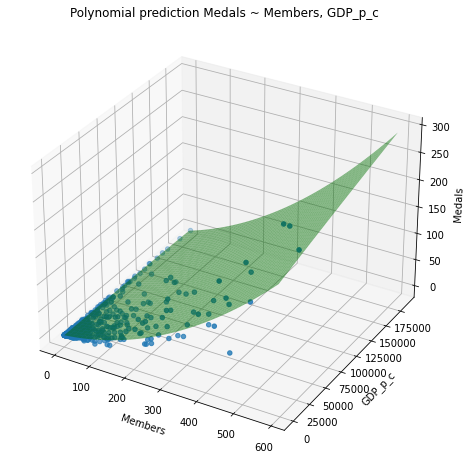

In [133]:
pol_3d_plot(x_test, y_test, pol[8], par[8])

In [134]:
def check_avarage(dataset, predictions, par):
    params = ', '.join(par) if (isinstance(par, list)) else par
    sum = 0
    count = 0
    for i in range(len(dataset)):
        count += 1
        sum += dataset.iloc[i, 4]
    print(f"\navarage medals amount:\n{round(sum / count, 5)}")
    sum = 0
    count = 0
    for pred in predictions:
        count += 1
        sum += pred
    print(f"avarage medals amount by polynomial model with {params} param(s):\n{round(sum / count, 5)}")

if (min_i < 15): check_avarage(dataset, prediction[min_i], par[min_i])
else: check_avarage(dataset, prediction[min_i], par[min_i - 15])


avarage medals amount:
8.40035
avarage medals amount by polynomial model with Population, Members, GDP_p_c param(s):
8.34881
